In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB
import re

Using TensorFlow backend.


In [5]:
train = pd.read_csv('train_E6oV3lV.csv')

In [7]:
test=pd.read_csv('test_tweets_anuFYb8.csv')

In [8]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [9]:
test.shape

(17197, 2)

In [10]:
train.shape

(31962, 3)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [12]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

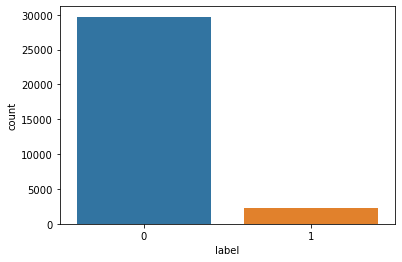

In [13]:
sns.countplot(train['label'])

# Lemmatization of the data (Data Preprocessing)

In [14]:
from nltk.stem.wordnet import WordNetLemmatizer

In [15]:
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return ' '.join(normalized_tweet)
    
train['lem_tweet']=train['tweet'].str.split().apply(normalization)
#print(normalization(tweet_list))

In [16]:
train.head()

,id,label,tweet,lem_tweet
0,1,0,@user when a father is dysfunctional and is s...,@user when a father be dysfunctional and be so...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thank for #lyft credit i can't use...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [17]:
def re_func(tweet_list):
    re_list=[]
    for word in tweet_list:
        x=re.findall('[A-Za-z]',word)
        re_list.append(''.join(x))
    
    return ' '.join(re_list)

train['lem_tweet2']=train['lem_tweet'].str.split().apply(re_func)

In [18]:
train.drop(['tweet','lem_tweet'],axis=1,inplace=True)
train.head()

,id,label,lem_tweet2
0,1,0,user when a father be dysfunctional and be so ...
1,2,0,user user thank for lyft credit i cant use cau...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in ur
4,5,0,factsguide society now motivation


In [19]:
X=train['lem_tweet2']
y=train['label']

# Vectorization of the features after removing the english stop words

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
vect=CountVectorizer(stop_words='english')
vect.fit(X,y)

CountVectorizer(stop_words='english')

In [22]:
vect.vocabulary_

{'user': 35224,
 'father': 11174,
 'dysfunctional': 9657,
 'selfish': 29469,
 'drag': 9345,
 'kid': 18045,
 'dysfunction': 9656,
 'run': 28661,
 'thank': 33087,
 'lyft': 20069,
 'credit': 7346,
 'use': 35215,
 'cause': 5398,
 'dont': 9194,
 'offer': 23904,
 'wheelchair': 36530,
 'vans': 35350,
 'pdx': 25069,
 'disapointed': 8804,
 'getthanked': 13071,
 'bihday': 3395,
 'majesty': 20270,
 'model': 21615,
 'love': 19696,
 'time': 33696,
 'ur': 35176,
 'factsguide': 10933,
 'society': 30748,
 'motivation': 21942,
 'huge': 15597,
 'fan': 11051,
 'fare': 11085,
 'big': 3338,
 'talk': 32588,
 'leave': 18780,
 'chaos': 5625,
 'pay': 25008,
 'dispute': 8916,
 'allshowandnogo': 879,
 'camp': 5018,
 'tomorrow': 33941,
 'danny': 7888,
 'school': 29180,
 'year': 37494,
 'exams': 10645,
 'think': 33467,
 'hate': 14562,
 'imagine': 16103,
 'actorslife': 249,
 'revolutionschool': 28109,
 'girl': 13192,
 'won': 37012,
 'land': 18525,
 'allin': 847,
 'cavs': 5408,
 'champions': 5588,
 'cleveland': 6209

In [23]:
def remove_digit(tweet_list):
    new_list=tweet_list
    for word in tweet_list:
        if word in ['ur','cleveland','clevelandcavaliers','im','gr','ireland','tcot','yugyoem','ig','ff','st','knicks','pa','abc','frm','mr',
                    'christina','christinagrimmie','blk','florida','gp','rb','th','pennsylvania','edwardsville','gbp','ppl','nashvilletour','dis','sta',
                   'clonakilty','doesnt','cds','ofw','rd','eos','sachintendulkar','thbihday','chrisevans','chris','evans','actor','sma','eah','id','lt',
                   'effo','aint','america','country','isnt','wimbledon','alyalshahawy','alreemgroup','ksleg','montreal','mydubai']:
            new_list.remove(word)
        
    return ' '.join(new_list)
            
train['lem_tweet3']=train['lem_tweet2'].str.split().apply(remove_digit)

In [24]:
train.drop('lem_tweet2',axis=1,inplace=True)
train.head()

,id,label,lem_tweet3
0,1,0,user when a father be dysfunctional and be so ...
1,2,0,user user thank for lyft credit i cant use cau...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in
4,5,0,factsguide society now motivation


In [25]:
X=train['lem_tweet3']
y=train['label']

In [37]:
vect=CountVectorizer(stop_words='english')
vect.fit(X,y)
vect.vocabulary_

{'user': 35186,
 'father': 11156,
 'dysfunctional': 9642,
 'selfish': 29434,
 'drag': 9330,
 'kid': 18019,
 'dysfunction': 9641,
 'run': 28627,
 'thank': 33050,
 'lyft': 20041,
 'credit': 7333,
 'use': 35177,
 'cause': 5393,
 'dont': 9179,
 'offer': 23873,
 'wheelchair': 36492,
 'vans': 35312,
 'pdx': 25037,
 'disapointed': 8790,
 'getthanked': 13049,
 'bihday': 3391,
 'majesty': 20242,
 'model': 21587,
 'love': 19668,
 'time': 33658,
 'factsguide': 10915,
 'society': 30712,
 'motivation': 21913,
 'huge': 15574,
 'fan': 11033,
 'fare': 11067,
 'big': 3334,
 'talk': 32552,
 'leave': 18752,
 'chaos': 5619,
 'pay': 24976,
 'dispute': 8902,
 'allshowandnogo': 876,
 'camp': 5013,
 'tomorrow': 33903,
 'danny': 7875,
 'school': 29145,
 'year': 37455,
 'exams': 10627,
 'think': 33429,
 'hate': 14539,
 'imagine': 16078,
 'actorslife': 247,
 'revolutionschool': 28075,
 'girl': 13170,
 'won': 36973,
 'land': 18497,
 'allin': 844,
 'cavs': 5403,
 'champions': 5582,
 'clevelandcavaliers': 6199,
 'w

In [38]:
X_trans=vect.transform(X)

In [39]:
X_trans.shape

(31962, 37920)

# Model Building with multinomial naive bayes algorithm

In [30]:
model=MultinomialNB()

model.fit(X_trans,y)


y_pred_class = model.predict(X_trans)
accuracy_score(y,y_pred_class)



0.9716538389337338

In [31]:
print(classification_report(y_pred_class,y))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     30104
           1       0.71      0.86      0.78      1858

    accuracy                           0.97     31962
   macro avg       0.85      0.92      0.88     31962
weighted avg       0.98      0.97      0.97     31962



# Vectorizing the test sample

In [32]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [35]:
test['lem_tweet']=test['tweet'].str.split().apply(normalization)
test['lem_tweet2']=test['lem_tweet'].str.split().apply(re_func)

In [40]:
X_test=test['lem_tweet2']
X_test.head()

0    studiolife aislife requires passion dedication...
1    user white supremacists want everyone to see t...
2    safe ways to heal your acne altwaystoheal heal...
3    be the hp and the curse child book up for rese...
4    rd bihday to my amazing hilarious nephew eli a...
Name: lem_tweet2, dtype: object

In [41]:
X_test_trans=vect.transform(X_test)

# Prediction with the test data

In [42]:
y_pred_test=model.predict(X_test_trans)

In [43]:
y_pred_test.shape

(17197,)

In [44]:
y_pred_test_df=pd.DataFrame(y_pred_test,columns=['label'])
y_pred_test_df.head()

,label
0,0
1,0
2,0
3,0
4,0


In [45]:
id_df=test['id']
id_df.head()

0    31963
1    31964
2    31965
3    31966
4    31967
Name: id, dtype: int64

In [46]:
test_classification_submission=pd.concat([id_df,y_pred_test_df],axis=1)

In [47]:
test_classification_submission.to_csv('submission_nlp.csv',index=False)